In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Read inputs

In [10]:
path = r'\\dena.de\Daten\Home\Reuter\Desktop\H2_pathways_repo\data\raw\H2_supply_route_assessment.xlsx'
path_csv r'\\dena.de\Daten\Home\Reuter\Desktop\H2_pathways_repo\data\processed\'
path_plt = r'\\dena.de\Daten\Home\Reuter\Desktop\H2_pathways_repo\Plots\'

In [11]:
tea_blue = pd.read_excel(path, sheet_name='LCOH_NGR', decimal=',', index_col=0)
tea_blue

,Reference,NGR with CCS,2020,2021,2022,2023,2024,2025,2026,2027,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Parameter,,,,,,,,,,,,,,,,,,,,,
LHV H2 [kWh/kg],https://www.iea-amf.org/content/fuel_informati...,33.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Discount rate [%],NaN,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lifetime [Years],IEA 2019,25.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Capex [USD/kW],IEA 2019,1680.00,1596.000000,1565.600000,1535.200000,1504.800000,1474.400000,1444.000000,1413.600000,1383.200000,...,1259.228807,1257.067367,1255.013998,1253.063298,1251.210133,1249.449627,1247.777145,1246.188288,1244.678874,1216.000000
Capex [€/kW],IEA 2019,1495.20,1420.440000,1393.384000,1366.328000,1339.272000,1312.216000,1285.160000,1258.104000,1231.048000,...,1120.713638,1118.789956,1116.962459,1115.226336,1113.577019,1112.010168,1110.521659,1109.107577,1107.764198,1082.240000
Opex [€/kW/a],NaN,NaN,42.613200,41.801520,40.989840,40.178160,39.366480,38.554800,37.743120,36.931440,...,33.621409,33.563699,33.508874,33.456790,33.407311,33.360305,33.315650,33.273227,33.232926,32.467200
Opex [% of Capex],IEA 2019,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Efficiency [%],IEA 2019,0.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CO2 capture rate [%],IEA 2019,0.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
prices = pd.read_excel(path, sheet_name='Commodity Prices', decimal=',', index_col=0)
prices

,Reference,2020,2021,2022,2023,2024,2025,2026,2027,2028,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Electricity prices in Germany [€_2020/MWh],NaN,NaN,NaN,512.000000,104.000000,NaN,150.000000,133.200000,116.40000,99.600000,...,56.30000,55.60000,54.900000,54.20000,53.50000,52.800000,52.100000,51.400000,50.700000,50.000000
Electricity prices in Norway [€_2018/MWh],DNV Gl 2018,46.683533,47.002654,47.209289,47.346703,47.274782,46.957092,46.416301,46.11822,45.738344,...,49.60933,50.70543,51.925184,53.19331,54.22122,54.704721,54.535295,53.994557,53.715329,53.994428
Electricity prices in Norway [€_2021/MWh],LMA 2021,31.000000,31.800000,32.600000,33.400000,34.200000,35.000000,39.400000,43.80000,48.200000,...,56.80000,54.60000,52.400000,50.20000,48.00000,45.800000,43.600000,41.400000,39.200000,37.000000
EU ETS [€_2020/t_CO2],NaN,25.000000,NaN,80.000000,NaN,NaN,88.000000,94.400000,100.80000,107.200000,...,194.20000,198.40000,202.600000,206.80000,211.00000,215.000000,219.000000,223.000000,227.000000,231.000000
CO2 prices global [USD_2021/t CO2],IEA WOE 2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250.000000
Gas prices in Germany [€_2020/MWh],NaN,13.000000,12.000000,150.000000,300.000000,150.000000,70.000000,60.000000,50.00000,35.000000,...,35.00000,35.00000,35.000000,35.00000,35.00000,35.000000,35.000000,35.000000,35.000000,35.000000
Gas prices in Canada [€_2020/MWh],https://www2.deloitte.com/content/dam/Deloitte...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gas prices EU USD_2021/MWh,IEA WOE 2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.800000


In [31]:
GHG =  pd.read_excel(path, sheet_name='GHG Footprint', decimal=',', index_col=0)
GHG

,Value,Ref,1990,1991,1992,1993,1994,1995,1996,1997,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
ID,,,,,,,,,,,,,,,,,,,,,
GHG intensity of electricity generation [g CO2eq/kWh] - Germany,NaN,EEA 2022,652.0,656.0,628.0,631.0,626.0,610.0,580.0,566.0,...,62.592000,46.94400,31.296000,15.648000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00
GHG intensity of electricity generation [g CO2eq/kWh] - Norway,NaN,Our world in Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.783673,6.91882,6.053968,5.189115,4.324263,3.45941,2.594558,1.729705,0.864853,0.00
Grey hydrogen emissions [g CO2/MJ H2] - Norway,96.77,Own calculation @ GWP20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grey hydrogen emissions [kg CO2/kg H2] - Norway,11.6124,Own calculation @ GWP20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blue hydrogen emissions [g CO2/MJ H2] - Norway,NaN,Own calculation @ GWP20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.499000,24.61800,23.737000,22.856000,21.975000,21.09400,20.213000,19.332000,18.451000,17.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hydrogen leakage,Predicted Emission Confidence level,Ref,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Electrolytic H2 production [% of produced H2],0.092,DOE 2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Electrolytic H2 production [% of produced H2] w/ recombination,0.0052,DOE 2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
lcoh_green = pd.read_excel(path, sheet_name='LCOH_RES', decimal=',', index_col=0)
lcoh_green

,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
ID,,,,,,,,,,,,,,,,,,,,,
United_Arab_Emirates_Onshore_3_low_temp_baseline,7.083424,6.891298,6.715543,6.552560,6.399783,6.255316,6.117722,5.985886,5.858925,5.736129,...,4.691380,4.628208,4.566471,4.512363,4.403312,4.338001,4.274817,4.213586,4.154154,4.096389
United_Arab_Emirates_Offshore_1_low_temp_baseline,11.470109,11.104346,10.787404,10.505314,10.249265,10.013359,9.793456,9.586545,9.390367,9.203187,...,7.248224,7.116204,6.992261,6.880684,6.719989,6.607285,6.500267,6.398248,6.300666,6.207051
United_Arab_Emirates_Offshore_2_low_temp_baseline,15.518520,15.026419,14.603391,14.229709,13.892937,13.584745,13.299293,13.032333,12.780680,12.541890,...,9.892514,9.713566,9.545998,9.395894,9.176013,9.024151,8.880277,8.743419,8.612779,8.487690
United_Arab_Emirates_PV_2_low_temp_baseline,3.990183,3.815470,3.659375,3.516671,3.384029,3.259207,3.140629,3.027147,2.917901,2.812232,...,2.123259,2.077646,2.033698,1.995168,1.933859,1.891448,1.850562,1.811050,1.772783,1.735653
United_Arab_Emirates_PV_3_low_temp_baseline,4.167158,3.984340,3.821167,3.672128,3.533712,3.403554,3.279992,3.161815,3.048116,2.938202,...,2.218239,2.170581,2.124678,2.084494,2.020231,1.975935,1.933247,1.892006,1.852079,1.813348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
South_Africa_PV_4_low_temp_optimistic,4.776238,4.522432,4.311259,4.130247,3.971568,3.830018,3.701980,3.584849,3.476693,3.376044,...,2.316135,2.243911,2.174816,2.115768,2.014671,1.948563,1.885225,1.824345,1.765661,1.708951
South_Africa_Onshore_3_high_temp_optimistic,6.957099,6.651531,6.361605,6.082880,5.812121,5.546874,5.285203,5.025533,4.766533,4.507054,...,3.527896,3.479815,3.432700,3.392380,3.300107,3.248513,3.198556,3.150082,3.102956,3.057060
South_Africa_Offshore_1_high_temp_optimistic,6.420926,6.101068,5.807786,5.532832,5.271000,5.018783,4.773702,4.533933,4.298081,4.065056,...,3.044944,2.985666,2.930034,2.880146,2.806048,2.755060,2.706577,2.660273,2.615880,2.573177


In [33]:
# Interest rate (WACC) in %
i_ngr = float(tea_blue.loc['Discount rate [%]']['NGR with CCS'])
i_ngr

0.05

In [34]:
# Economic lifetime of the plant in years
l_ngr = float(tea_blue.loc['Lifetime [Years]']['NGR with CCS'])
l_ngr

25.0

In [45]:
opex_share = float(tea_blue.loc['Opex [% of Capex]']['NGR with CCS'])
opex_share

0.03

In [35]:
# Calculate the amortisation factor alpha
alpha_ngr = (i_ngr * (1 + i_ngr) ** l_ngr) / (1 + i_ngr) ** (l_ngr - 1)
alpha_ngr
#round(alpha, 2)

0.05250000000000001

In [36]:
CF = float(tea_blue.loc['Availability [%]']['NGR with CCS'])
CF

0.95

In [37]:
# Plant efficiency in %
n = float(tea_blue.loc['Efficiency [%]']['NGR with CCS'])
n

0.69

In [38]:
# P_ccs is the cost for transporting and storing CO2 in $/t_co2
P_ccs = float(tea_blue.loc['CO2 transport and storage cost [€/t CO2]']['NGR with CCS'])
P_ccs

20.0

In [39]:
# LHV of hydrogen is 33.33 kWh/kg
LHV_h2 = float(tea_blue.loc['LHV H2 [kWh/kg]']['NGR with CCS'])
LHV_h2

33.33

# Calc. blue LCOH

Definition of the cost calculation function for LCOH from NGR. Time relevant variables = capex, opex, P_ng, P_co2
LHV H2 [kWh/kg]
capex_y  [€/kW]
opex_y [€/kW/a]
CF [%]
P_ng_y [€/MWh]
Q_ce [kgCO2/kgH2]
Q_ue [kgCO2/kgH2]
P_ccs [€/t CO2]
P_co2_y [€/t CO2]


In [40]:
def calculate_lcoh_ngr(alpha, capex_y, opex_y, CF, P_ng_y, n, Q_ce_y, P_ccs, Q_ue_y, P_co2_y, LHV_h2):

    result = float(LHV_h2 * ((alpha * capex_y + opex_y) / (CF * 8760) + P_ng_y / 1000 * n) + (Q_ce_y * P_ccs + Q_ue_y * P_co2_y) / 1000)

    return result

In [55]:
# Calculation of LCOH from NGR for every year from 2025 to 2050.
years = np.arange(2025,2051)
result = pd.DataFrame(index=years, columns=['LCOH_BLUE'])
result.index.name = 'Years'


for year in years:

    # get capex, opex, natural gas price and CO2 price of specific year
    capex_y = float(tea_blue.loc['Capex [€/kW]'][year])
    opex_y = capex_y * opex_share
    Q_ce_y = float(GHG.loc['Captured emissions [kg CO2/kg H2]'][year])
    Q_ue_y = float(GHG.loc['Blue hydrogen emissions [kg CO2/kg H2] - Norway'][year])
    P_ng_y = float(prices.loc['Gas prices in Germany [€_2020/MWh]'][year])
    P_co2_y = float(prices.loc['EU ETS [€_2020/t_CO2]'][year])

    # calculate lcoe of specific year
    result.LCOH_BLUE.loc[year] = calculate_lcoh_ngr(alpha=alpha_ngr, capex_y=capex_y, opex_y=opex_y, CF=CF, P_ng_y=P_ng_y,
                                              n=n, Q_ce_y=Q_ce_y, P_ccs=P_ccs, Q_ue_y=Q_ue_y, P_co2_y=P_co2_y, LHV_h2=LHV_h2)

result

,LCOH_BLUE
Years,
2025,2.58982
2026,2.373447
2027,2.15572
2028,1.821652
2029,1.831196
2030,1.839387
2031,1.856517
2032,1.872223
2033,1.886502


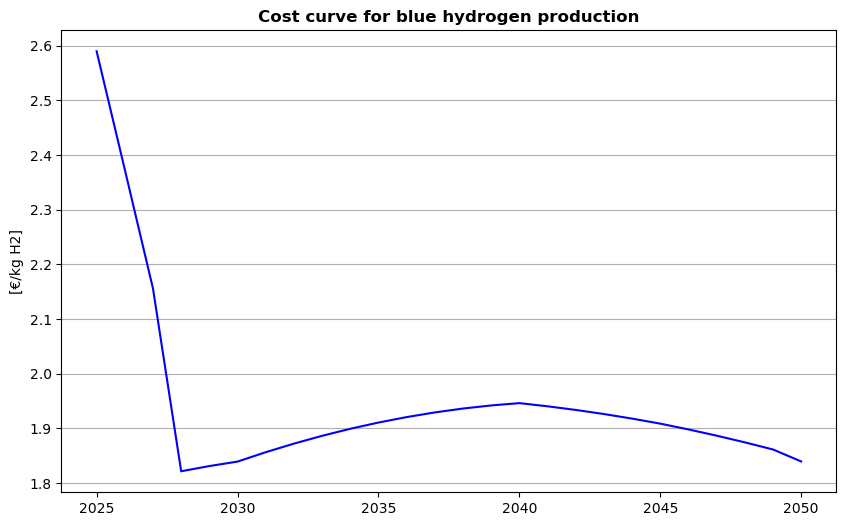

In [53]:
# Plot cost curve of hydrogen production from NGR with CCS
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(result, color = 'blue', linestyle = 'solid')
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
plt.title('Cost curve for blue hydrogen production', fontweight='bold')
#plt.xlabel('Year')
plt.ylabel('[€/kg H2]')
plt.show()

In [42]:
# Create csv file from results dataframe
output_file = os.path.join(path_csv,'LCOH_NGR.csv')
result.to_csv(output_file, sep = ';')

NameError: name 'path_csv' is not defined

In [ ]:
# export result to excel
from openpyxl import load_workbook
path = '/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/H2_supply_route_assessment.xlsx'

writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Results']

result.to_excel(writer, sheet_name='Reference Results', index=True, startcol=ws.max_column)
book.save('/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/H2_supply_route_assessment.xlsx')
book.close()

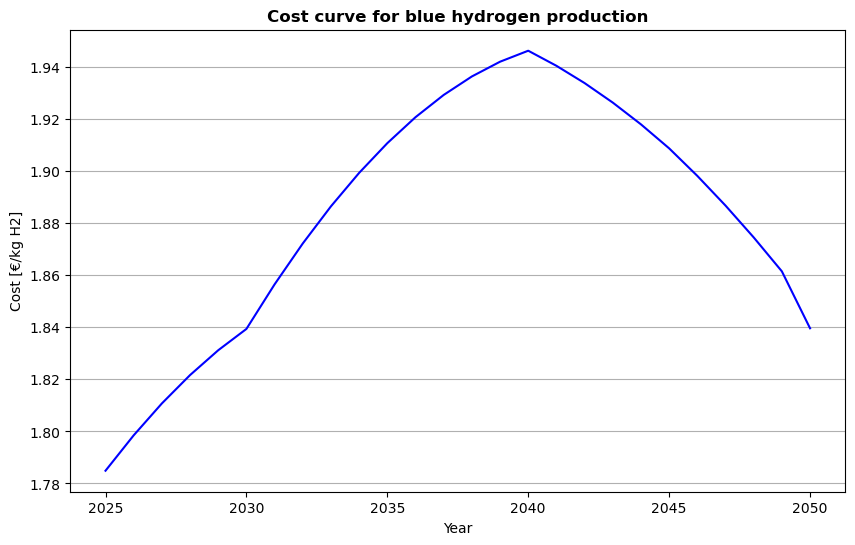

# Green LCOH

In [ ]:
# LCOH from RES in €_2019/kg H2 from EWI 2019 [$_2019/kg H2]
green_off1_opt_lowtemp = (lcoh_green.loc['Norway_Offshore_1_low_temp_optimistic', 2025:2050]).mul(0.89)
green_off1_opt_lowtemp

In [ ]:
# Plot cost curve of hydrogen production from RES
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(green_off1_opt_lowtemp, color = 'green', linestyle = 'solid')
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
plt.title('Cost curve for green hydrogen production', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Cost [€/kg H2]')
plt.show()

# Green and blue


In [ ]:
lowest_green = (lcoh_green.loc['Norway_Onshore_1_low_temp_optimistic', 2025:2050]).mul(0.89)

NameError: name 'lowest_green' is not defined

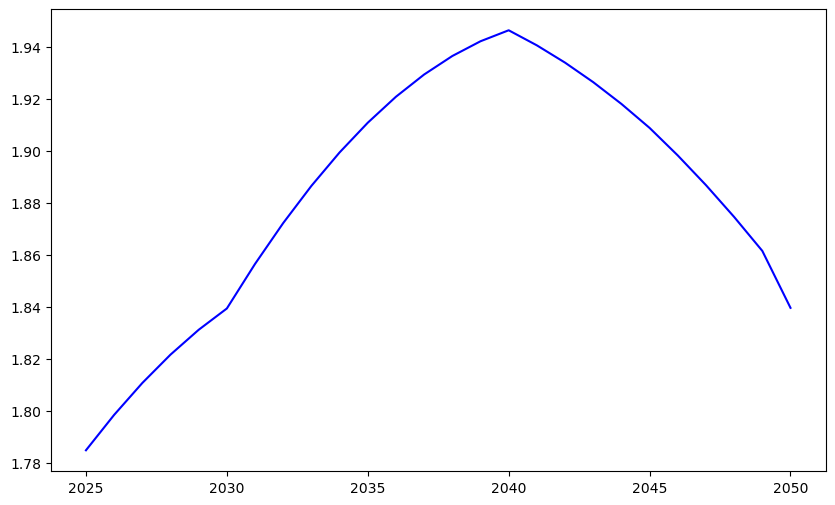

In [43]:
# Plot cost curves of hydrogen production from NGR with CCS and RES
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(result, color = 'blue', linestyle = 'solid', label='Blue hydrogen')
plt.plot(lowest_green, color = 'green', linestyle = 'solid', label='Green hydrogen')
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
plt.title('Cost curves for green and blue hydrogen production', fontweight='bold')
ax.legend()
plt.xlabel('Year')
#plt.ylim(0)
plt.ylabel('Cost [€/kg H2]')
plt.show()

In [ ]:
result = lowest_green

In [ ]:
# export result to excel
from openpyxl import load_workbook
path = '/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/H2_supply_route_assessment.xlsx'

writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save('/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/H2_supply_route_assessment.xlsx')
book.close()